# Preliminaries

In [27]:
# Preliminaries
import numpy as np
from numpy import random as rd
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.stats import norm
import time as tit

plt.rcParams['figure.figsize'] = [10, 6]

# Supplied code:

from numpy import pi, sqrt, log, exp

#
# Normal cumulative distribution function, with extension
# for complex argument with small imaginary component
#


def norm_cdf(x):
    if not isinstance(x, np.ndarray):
        xr = x.real
        xi = x.imag
        if abs(xi) > 1.0e-10:
            raise ValueError("imag(x) too large in norm_cdf(x)")

        ncf = norm.cdf(xr)
        if abs(xi) > 0:
            ncf = ncf + 1.0j * xi * norm.pdf(xr)
    else:
        xr = np.real(x)
        xi = np.imag(x)
        if any(abs(xi) > 1.0e-10):
            raise ValueError("imag(x) too large in norm_cdf(x)")

        ncf = norm.cdf(xr)
        if any(abs(xi) > 0):
            ncf = ncf + 1.0j * xi * norm.pdf(xr)

    return ncf


# V = european_call(r,sigma,T,S,K,opt)
#
# Black-Scholes European call option solution
# as defined in equation (3.17) on page 48 of
# The Mathematics of Financial Derivatives
# by Wilmott, Howison and Dewynne
#
# r     - interest rate
# sigma - volatility
# T     - time interval
# S     - asset value(s)  (float or flattened numpy array)
# K     - strike price(s) (float or flattened numpy array)
# opt   - 'value', 'delta', 'gamma' or 'vega'
# V     - option value(s) (float or flattened numpy array)
#


def european_call(r, sigma, T, S, K, opt):

    S = S + 1.0e-100  # avoids problems with S=0
    K = K + 1.0e-100  # avoids problems with K=0

    d1 = (log(S) - log(K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S) - log(K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))

    if opt == "value":
        V = S * norm_cdf(d1) - exp(-r * T) * K * norm_cdf(d2)
    elif opt == "delta":
        V = norm_cdf(d1)
    elif opt == "gamma":
        V = exp(-0.5 * d1 ** 2) / (sigma * sqrt(2 * pi * T) * S)
    elif opt == "vega":
        V = S * (exp(-0.5 * d1 ** 2) / sqrt(2 * pi)) * (sqrt(T) - d1 / sigma) - exp(
            -r * T
        ) * K * (exp(-0.5 * d2 ** 2) / sqrt(2 * pi)) * (-sqrt(T) - d2 / sigma)

    else:
        raise ValueError(
            'invalid value for opt -- must be "value", "delta", "gamma", "vega"'
        )

    return V

# Exercise #1

## Exercise 1.a

We recall that a $\mathcal{U}(0,1)$ distribution has mean 0 and variance $\frac{1}{12} \approx 0.083$. This is confirmed empirically using $n = 1000000$ samples. 

In [2]:
n = 1000000
uni_samp = rd.rand(n)
print([np.mean(uni_samp), np.var(uni_samp)])

[0.5005022218277406, 0.08336021720297941]


Similarly we confirm that $n=1000000$ samples from a $\mathcal{N}(0,1)$ distribution have the expected mean and variance.

In [3]:
nor_samp = rd.randn(n)
print([np.mean(nor_samp), np.var(nor_samp)])

[0.0013085801435828333, 0.9996075642293089]


## Exercise 1.b

This code returns the empirical co-variance matrix of $n= 1000000$ pairs obtained using the Cholesky factorization method as well as the mean of all 2000000 samples.

In [4]:
Sigma = np.array([[4, 1], [1, 4]])
nor_samp_2 = rd.randn(2, n)

# Cholesky
L = la.cholesky(Sigma)
cov_nor_samp_2 = np.dot(L, nor_samp_2)
print([np.cov(cov_nor_samp_2), np.mean(cov_nor_samp_2)])

[array([[4.00369838, 1.00559998],
       [1.00559998, 3.99998322]]), -0.0007219292787207811]


## Exercise 1.c

As above except we now use the PCA method to convert pairs of independent samples to pairs of correlated samples.

In [5]:
# PCA
Sig_eig, Sig_eigvects = la.eig(Sigma)  # eigenvalues and #eigenvectors of Sigma
Sig_sqrt = np.diag(np.sqrt(Sig_eig))
L_new = np.dot(Sig_eigvects, Sig_sqrt)
cov_nor_samp_2 = np.dot(L_new, nor_samp_2)
print([np.cov(cov_nor_samp_2), np.mean(cov_nor_samp_2)])

[array([[3.99660186, 1.00334574],
       [1.00334574, 4.00595262]]), -0.002337906883279271]


## Exercise 1.d

This code times how many pairs of correlated samples can be simulated form pairs of independent samples using the Cholesly factorization method. An analogue for the PCA method can be obtained by replacing $L$ with $L_{\text{new}}$ in the code below.

In [6]:
start = tit.time()
time = start

n = 1000000  # increments of number of samples
count = 0

while time < 60 + start:

    nor_samp_2 = rd.randn(2, n)

    cov_nor_samp_2 = np.dot(
        L, nor_samp_2
    )  # recovering correlated samples with Cholesky decomposition

    time = tit.time()
    count = count + 1

print(count * n)

1065000000


# Exercise #2

## Exercise 2.a

Using the double-angle formula for cosine and integration by parts, we obtain
\begin{align}
\mathbb{E} \left[ f(U) \right] &= -\frac{2}{\pi^2}, & \mathbb{E} \left[ \left( f(U) \right)^2 \right] = \frac{4 \pi^3 +6 \pi}{24\pi^3}.
\end{align}

In [33]:
# the above values are embedded in the code as follows
ex = -2 / np.pi ** 2
ex2 = (4 * np.pi ** 3 + 6 * np.pi) / (24 * np.pi ** 3)
var = ex2 - ex ** 2


def f(x):
    return x * np.cos(x * np.pi)

## Exercises 2.b, 2.c and 2.d

We combine the code from these exercises in a single function in order to re-use this function in Exercise 3.

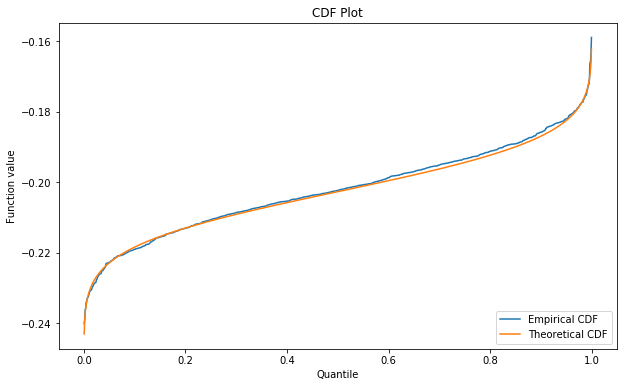

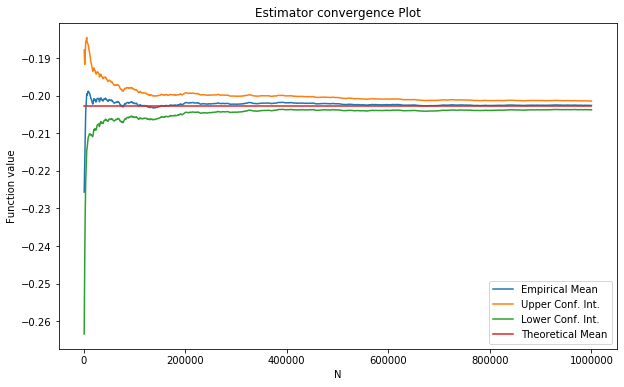

In [34]:
# P(f, ex, var=None)
#
# Function producing two plots:
# (1) - superimposition of empirical and theoretical cdfs based on 1000 sets of 1000 samples.
# (2) - empirical mean of f(U) where U is a U(0,1) r.v. together with confidence intervals based on three standard deviations
#       as a function of sample size N. Also plotted is the theoretical expectation of f(U) for reference purposes.
#
# f     - function from [0,1] to R
# ex    - theoretical expectation of f(U) where U is a U(0,1) r.v.
# var   - theoretical variance of f(U) where U is a U(0,1) r.v. (if var=None this is estimated empirically)


def P(f, ex, var=None):
    def C(m):
        return (m - 1 / 2) / 1000

    vals = f(rd.rand(1000, 1000))
    y_axis = np.sort(np.mean(vals, axis=1))
    x_axis = C(np.asarray(range(1, 1001)))

    if var == None:
        var = np.mean((vals - ex) ** 2)

    y_axis_th = norm.ppf(x_axis, ex, np.sqrt(var / 1000))

    plt.plot(x_axis, y_axis, label="Empirical CDF")
    plt.plot(x_axis, y_axis_th, label="Theoretical CDF")
    plt.title("CDF Plot")
    plt.xlabel("Quantile")
    plt.ylabel("Function value")
    plt.legend(loc="lower right")
    plt.show()

    f_rand = f(rd.rand(1000000))
    x_vec = np.empty(0)
    y_vec = np.empty(0)
    var_vec = np.empty(0)

    for N in range(1, 1001):
        N_curr = 1000 * N
        f_curr = f_rand[0 : (N_curr - 1)]
        x_vec = np.append(x_vec, N_curr)
        y_vec = np.append(y_vec, np.mean(f_curr))
        var_vec = np.append(var_vec, np.mean((f_curr - ex) ** 2 / N_curr))

    cinf = 3 * np.sqrt(var_vec)

    plt.plot(x_vec, y_vec, label="Empirical Mean")
    plt.plot(x_vec, y_vec + cinf, label="Upper Conf. Int.")
    plt.plot(x_vec, y_vec - cinf, label="Lower Conf. Int.")
    plt.plot(x_vec, [ex] * 1000, label="Theoretical Mean")
    plt.title("Estimator convergence Plot")
    plt.xlabel("N")
    plt.ylabel("Function value")
    plt.legend(loc="lower right")
    plt.show()


P(f, ex, var)

The results we obtain are consistet with the Central Limit Theorem. We observe a near overlap between the emprical and theoretical CDFs in our first plot. While this is a very vague statement, it could be formalized using a goodness of fit test. For the second plot, we observe how relatively wide convidence interval for the empirical mean when $N = 1000$ day as $N$ increases. This decay should theoretically be of the order of $N^{-1/2}$ but this is not exact in our case since we estimate the variance of our estimator based on a finite (and increasing amount of samples). We also observe that the theoretical mean of $f(U)$ is always within the confidence interval and that the empirical and theoretical means converge to the point that we cannot distinguish the two lines in the plot. All these observations are consistent with the Central Limit Theorem and hence give credibility to the code.

# Exercise #3

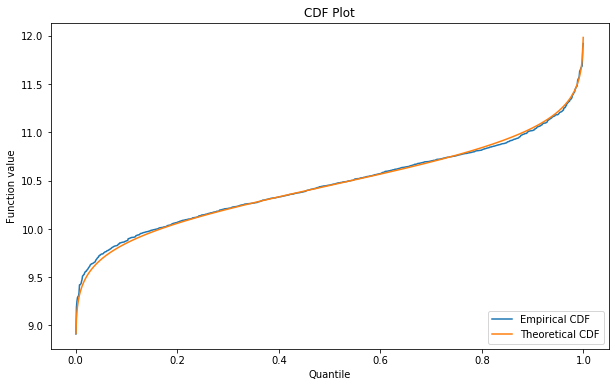

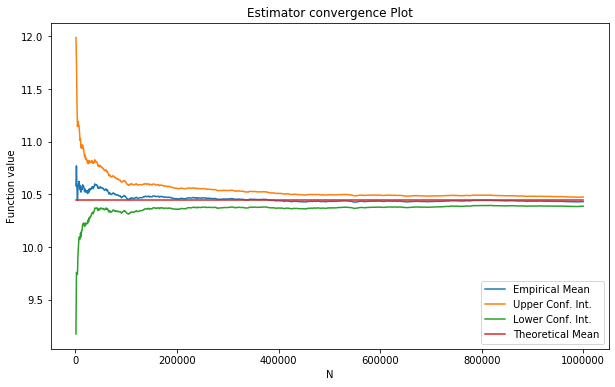

In [28]:
# model parameters
[r, sigma, S_0, K, T] = [0.05, 0.2, 100, 100, 1]

# theoretical price of a call option in the Black Scholes model with parameters as specified above
ex = european_call(r, sigma, T, S_0, K, opt="value")

# S(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K)
#
# Stock price in the Black-Scholes Model
#
# x     - number between 0 and 1
# r     - interest rate (default as specified above)
# sigma - volatility (default as specified above)
# T     - time interval (default as specified above)
# S_0   - initial stock price (default as specified above)


def S(x, r=r, sigma=sigma, T=T, S_0=S_0):
    return S_0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * norm.ppf(x))


# f_call(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K)
#
# Call payoff in the Black-Scholes Model
#
# x     - number between 0 and 1
# r     - interest rate (default as specified above)
# sigma - volatility (default as specified above)
# T     - time interval (default as specified above)
# S_0   - initial stock price (default as specified above)
# K     - strike price (default as specified above)


def f_call(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K):
    test = S(x, r, sigma, T, S_0) - K
    return np.exp(-r * T) * (abs(test) + test) / 2


P(f_call, ex, var=None)

# Exercise #4

This code produces an array with the variances of (1) the vanilla estimator, (2) the antithetic variate estimator and (3) the control variate estimator. It also outputs the estimated correlation between $f(W)$ and $f(-W)$.

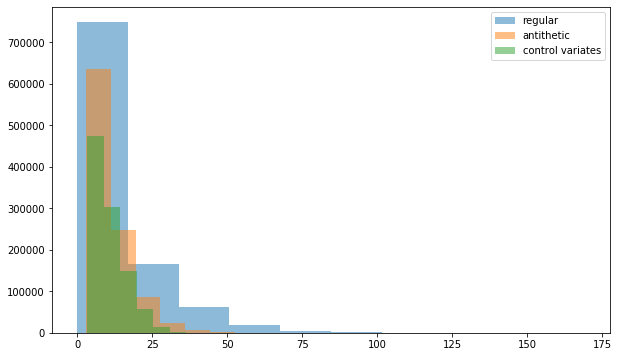

[0.000216599512082803, 5.395697952566402e-05, 3.1428046185175657e-05] -0.5010462271156673


In [29]:
n = 1000000
rand_vals = rd.rand(n)
p1 = f_call(rand_vals)
p2 = f_call(1 - rand_vals)  # switching tails
av_price = 0.5 * (p1 + p2)
est_corr = np.corrcoef(p1, p2)[0, 1]

# comparison of regular and antithetic variances
regular_variance = np.var(p1) / n

antithetic_variance = np.var(av_price) / n

p_control = np.exp(-r * T) * S(rand_vals)
cov_mat = np.cov(p_control, p1)
lbda = cov_mat[0, 1] / cov_mat[0, 0]

# control variance
control_variance = np.var(p1 - lbda * (p_control - S_0)) / n

# plotting histograms
plt.hist(p1, alpha=0.5, label="regular")
plt.hist(av_price, alpha=0.5, label="antithetic")
plt.hist(p1 - lbda * (p_control - S_0), alpha=0.5, label="control variates")
plt.legend()
plt.show()

print([regular_variance, antithetic_variance, control_variance], est_corr)

# Exercise #5

## Exercise 5.a

This code produces two outputs: (1) a vanilla Monte carlo estimator of the price of a digital put option in the Black Scholes model with $N = 10000000$ and (2) the number of samples $N$ such that the 3 standard deviation confidence limit of our estimator corresponds to ± 10\%. For the latter we observe that such $N$ must in theory satisfy 
\begin{align}
\label{funnyeq}
3 * \frac{\sigma}{\sqrt{N}} = 0.10 * \mu,
\end{align}
where $\mu$ an $\sigma$ are the exact expectation and standard deviation of the option payoff. Replacing $\mu$ an $\sigma$ by their estimators based on $10000000$ samples, we can solve (\ref{funnyeq}) for $N$ and then take the ceiling to obtain an integer value.

In [11]:
# model parameters
[r, sigma, S_0, K, T] = [0.05, 0.2, 100, 50, 1]

n = 10000000
rand_vec = rd.rand(n)

# f(x)
#
# Digital put option payoff in the Black-Scholes Model
#
# x     - number between 0 and 1

def f(x):
    return np.exp(-r * T) * np.heaviside(K - S(x), 0.5)  # re-using stock price function

f_rand = f(rand_vec)

[ex, var] = [np.mean(f_rand), np.var(f_rand)]

print(ex, np.ceil(900 * var / ex ** 2))

0.0001410673236534568 6067880.0


## Exercise 5.b

From the dynamics of a stock price in the Black Scholes model we wish to find $r^*$ such that 

\begin{align}
K = S_0 \exp \left( \left( r^* - 0.5 \sigma^2 \right)T \right)
\end{align}

and we easily deduce that 

\begin{align}
r^* = \frac{\log \left( \frac{K}{S_0} \right) + 0.5 \sigma^2 T }{T}.
\end{align}

In the below code we essentially repeat Exercise 5.a except we now simulate stock prices with drift $r^*$ and obtain an estimator for the price of a digital put option when the underying stock has drift $r$ using importance sampling. Calculation of the likelihood ratio for importance sampling relies on the log-normal distribution of stock prices in the Black Scholes model. 

In [12]:
# new drift
r_star = (np.log(K / S_0) + 0.5 * sigma ** 2 * T) / T

# f_star(x)
#
# Digital put option payoff scaled by the likelihood ratio when stock prices are simulated from the model with r_star
#
# x     - number between 0 and 1


def f_star(x):
    # stock price with drift r_star
    S_T = S_0 * np.exp(
        (r_star - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * norm.ppf(x)
    )
    log_s = np.log(S_T / S_0)
    # likelihood ratio
    lr = np.exp(
        (
            (log_s - (r_star - 0.5 * sigma ** 2) * T) ** 2
            - (log_s - (r - 0.5 * sigma ** 2) * T) ** 2
        )
        / (2 * sigma ** 2 * T)
    )
    return np.exp(-r * T) * np.heaviside(K - S_T, 0.5) * lr


f_rand_star = f_star(rand_vec)

[ex_star, var_star] = [np.mean(f_rand_star), np.var(f_rand_star)]

N_star = np.ceil(900 * var_star / ex_star ** 2)

print(ex_star, N_star)

0.000142402887962651 3666.0


# Exercise #6

In this code we compare the performance of the finite difference method (with re-used and with independent samples) as well as the pathwise method for estimating the Black Scholes delta and vega. We compare the estimators with the theoretical finite differences based on the explicit formula for a Black Scholes call option price as well as the exact sensitivities that can be calculated using this formula. For the pathwise approach, we use the fact that for the call option price in the Black Scholes model
\begin{align}
Y = \exp(-rT) \left( S_t-K \right)_+,
\end{align}
we have
\begin{align}
\frac{\partial Y}{\partial S_0} &= \exp(-rT) \frac{S_T} {S_0} 1_{S_T > K}, &
\frac{\partial Y}{\partial \sigma} &= \exp(-rT)  \frac{\log(S_T / S_0 ) - \left(r-\sigma^2/2 \right) T}{\sigma} S_T 1_{S_T > K}.
\end{align}

In [13]:
#Model parameters
[r, sigma, S_0, K, T] = [0.05, 0.2, 100, 100, 1]

#Theoretical call option price in the Black Scholes model
ex = european_call(r, sigma, T, S_0, K, opt="value")

# fd_method(h, r=r, sigma=sigma, T=T, S_0=S_0, K=K, rep=True, tpe=True)
#
# Function returns mean and variance of 100000 samples of finite differences.
#
# h     - bump size
# r     - interest rate (default as specified above)
# sigma - volatility (default as specified above)
# T     - time interval (default as specified above)
# S_0   - initial stock price (default as specified above)
# K     - strike price (default as specified above)
# rep   - Boolean: if tpe=True then re-use samples, else use independendent samples
# tpe   - Boolean: if rep=True then apply finite difference to S_0, else to sigma

def fd_method(h, r=r, sigma=sigma, T=T, S_0=S_0, K=K, rep=True, tpe=True):

    y_vec = np.empty(0)
    var_vec = np.empty(0)

    for N in range(0, len(h)):

        [h1, h2] = [0, 0]

        if tpe == True:
            h2 = h[N]
        else:
            h1 = h[N]

        rand_vec = rd.rand(100000)
        v_1 = (
            f_call(rand_vec, r, sigma + h1, T, S_0 + h2, K)
            + f_call(1 - rand_vec, r, sigma + h1, T, S_0 + h2, K)
        ) / 2

        if rep == True:
            v_2 = (
                f_call(rand_vec, r, sigma - h1, T, S_0 - h2, K)
                + f_call(1 - rand_vec, r, sigma - h1, T, S_0 - h2, K)
            ) / 2
        else:
            rand_vec_2 = rd.rand(100000)
            v_2 = (
                f_call(rand_vec_2, r, sigma - h1, T, S_0 - h2, K)
                + f_call(rand_vec_2, r, sigma - h1, T, S_0 - h2, K)
            ) / 2

        y_vec = np.append(y_vec, np.mean(v_1 - v_2) / (2 * h[N]))
        var_vec = np.append(var_vec, np.var((v_1 - v_2) / (2 * h[N])) / 100000)

    return y_vec, var_vec

# test(h, r=r, sigma=sigma, T=T, S_0=S_0, K=K, tpe=True)
#
# Function returns theoretical finite difference based on the formula for a call option price in the Black Scholes model.
#
# h     - bump size
# r     - interest rate (default as specified above)
# sigma - volatility (default as specified above)
# T     - time interval (default as specified above)
# S_0   - initial stock price (default as specified above)
# K     - strike price (default as specified above)
# tpe   - Boolean: if rep=True then apply finite difference to S_0, else to sigma

def test(h, r=r, sigma=sigma, T=T, S_0=S_0, K=K, tpe=True):

    if tpe == True:

        return (
            european_call(r, sigma, T, S_0 + h, K, opt="value")
            - european_call(r, sigma, T, S_0 - h, K, opt="value")
        ) / (2 * h)

    else:
        return (
            european_call(r, sigma + h, T, S_0, K, opt="value")
            - european_call(r, sigma - h, T, S_0, K, opt="value")
        ) / (2 * h)

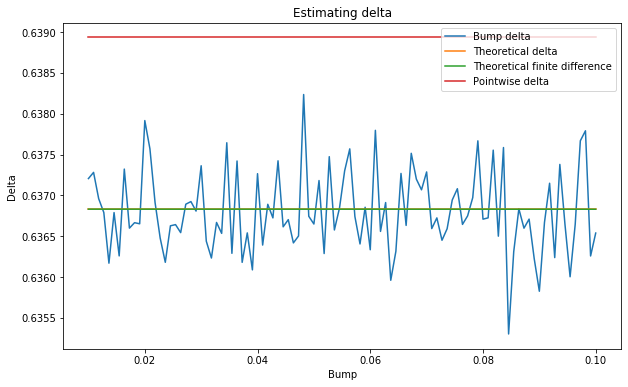

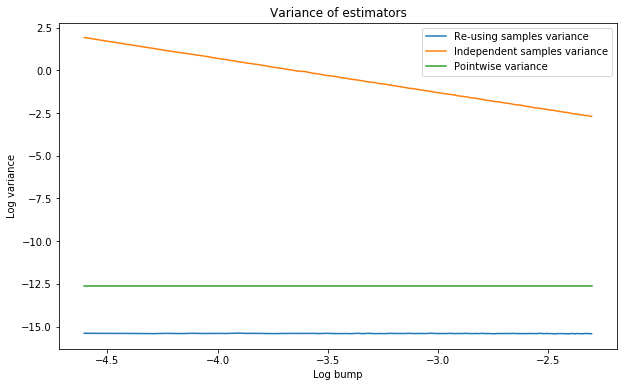

In [30]:
# testing delta finite difference

# f_call_ds(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K)
#
# Function returns a pathwise "delta" sensitiviity based on the explicit formula. 
#
# x     - number between 0 and 1
# r     - interest rate (default as specified above)
# sigma - volatility (default as specified above)
# T     - time interval (default as specified above)
# S_0   - initial stock price (default as specified above)
# K     - strike price (default as specified above)

def f_call_ds(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K):
    S_T = S(x, r, sigma, T, S_0)
    test = S_T - K
    return np.exp(-r * T) * S_T / S_0 * (abs(test) + test) / (2 * abs(test))


# f_call_dsigma(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K)
#
# Function returns a pathwise "vega" sensitiviity based on the explicit formula. 
#
# x     - number between 0 and 1
# r     - interest rate (default as specified above)
# sigma - volatility (default as specified above)
# T     - time interval (default as specified above)
# S_0   - initial stock price (default as specified above)
# K     - strike price (default as specified above)

def f_call_dsigma(x, r=r, sigma=sigma, T=T, S_0=S_0, K=K):
    S_T = S(x, r, sigma, T, S_0)
    test = S_T - K
    return (
        np.exp(-r * T)
        * (-sigma * T + np.sqrt(T) * norm.ppf(x))
        * S_T
        * (abs(test) + test)
        / (2 * abs(test))
    )

# plot_fun(tpe)
#
# Function producing two plots (using N= 100000 samples for estimators):
# (1) - superimposition of the theoretical sensitivity, theoretical finite difference sensitivitiy (based on the explicit
#       formula for a call option price in the Black Scholes model), one estimator of the pathwise sensitivity and finally
#       one estimator for the finite difference sensitivity as a function of bump size from 0.01 to 0.1 (100 bumps considered).
# (2) - (Estimated) Log-variance as a function of log-bump size for the estimator of the finite difference sensitivity with 
#       and without re-using samples as well as an (estimated) log-variance of the pathwise estimator. 
#
# tpe   - Boolean: if rep=True then apply function to S_0 (delta), else to sigma (vega)


def plot_fun(tpe):

    if tpe == True:
        strg = "delta"
        f = f_call_ds
    else:
        strg = "vega"
        f= f_call_dsigma

    x_vec = np.linspace(0.01, 0.1, num=100)
    output = fd_method(x_vec, rep=True, tpe=tpe)
    var_vec_2 = fd_method(x_vec, rep=False, tpe=tpe)[1]
    [y_vec, var_vec] = [output[0], output[1]]

    ex = european_call(r, sigma, T, S_0, K, opt=strg)
    pwise_samples = f(rd.rand(100000))
    [pwise, pwise_var] = [np.mean(pwise_samples), np.var(pwise_samples) / 100000]

    plt.plot(x_vec, y_vec, label="Bump " + strg)
    plt.plot(x_vec, [ex] * 100, label="Theoretical " + strg)
    plt.plot(x_vec, test(x_vec, tpe=tpe), label="Theoretical finite difference")
    plt.plot(x_vec, [pwise] * 100, label="Pointwise " + strg)
    plt.title("Estimating delta")
    plt.xlabel("Bump")
    plt.ylabel(strg.capitalize())
    plt.legend(loc="upper right")
    plt.show()

    x_log = np.log(x_vec)

    plt.plot(x_log, np.log(var_vec), label="Re-using samples variance")
    plt.plot(x_log, np.log(var_vec_2), label="Independent samples variance")
    plt.plot(x_log, [np.log(pwise_var)] * 100, label="Pointwise variance")
    plt.title("Variance of estimators")
    plt.xlabel("Log bump")
    plt.ylabel("Log variance")
    plt.legend(loc="upper right")
    plt.show()


plot_fun(tpe=True)

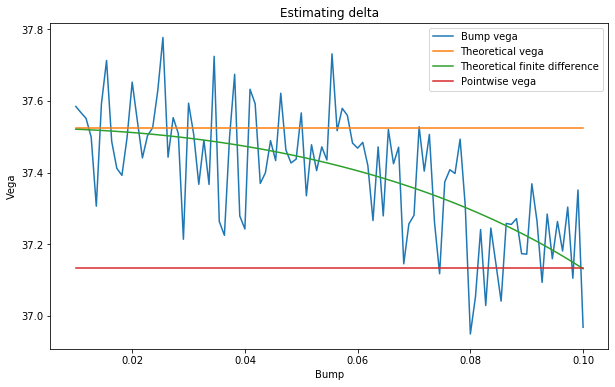

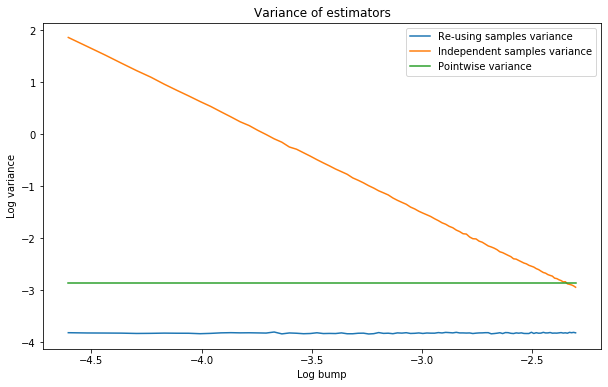

In [31]:
# testing vega finite difference

plot_fun(tpe=False)